# Data Analysis 2
    In which I look at a slightly different interpretation of notable alumni per year and check see if there is a
    different increasing top college by this standard.

Now, instead of evaluating *total* notable alumni over time, we will look at the number of *new* notable alumni by time. This should give a similar graph, but there may be a little more variation.

In [1]:
import pandas
import numpy
from matplotlib import pyplot

In [4]:
tertiary_education = pandas.read_csv('tertiary_education_filtered.csv')
tertiary_education.set_index('school',inplace=True)
tertiary_education.head()

,count,notable_students
school,,
École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
Pierre and Marie Curie University,48,"['Alain Connes', 'Ahmad Motamedi', 'Pierre-Lou..."
Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
ETH Zurich|Federal Polytechnic School,1,['Albert Einstein']
Zurich,15,"['Albert Einstein', 'Claus Westermann', 'Annem..."


In [10]:
wikipeople = pandas.read_csv('wikipeople_cleaned.csv')
wikipeople.set_index('name',inplace=True)

In [7]:
top_ten = ['Harvard University',
'Yale University',
 'Columbia University',
 'Stanford University',
 'University of Michigan',
 'Princeton University',
 'University of Cambridge',
 'New York University',
 'University of Chicago',
 'Cornell University']

In [8]:
years = [1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]

In [14]:
# pandas misinterpreted the arrays in notable_students as strings; we have to fix that
import re
def string_to_array(thing):
    # if it is already an array, return
    if isinstance(thing, list):
        return thing
    # else turn it into an array
    array = []
    while len(thing) > 2:
        temp = ' '
        r = re.search('\'([^,]*)\'', thing)
        if r:
            temp = r.group(1)
            array.append(temp)
        else:
            return array
        thing = thing[len(temp)+4:]
    return array

In [15]:
tertiary_education['notable_students'] = [ string_to_array(alumnus) for alumnus in tertiary_education['notable_students'] ]

In [18]:
# Now we create a data set of new notable alumni by year
i = 0
schools_success_per_year = []
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the converstion from string to array
                alumnus = 'Lupita Nyong\'o'
            graduation_date = wikipeople.loc[alumnus]['birth_date'] + 22
            if graduation_date <= year and graduation_date >= year - 5:
                count += 1
        temp_success.append(count)
    schools_success_per_year.append(temp_success)
    i += 1

In [19]:
colors = ['blue','green','red','cyan','magenta','black','teal','lime','orange','brown']

### Success of Top Ten Schools per Year

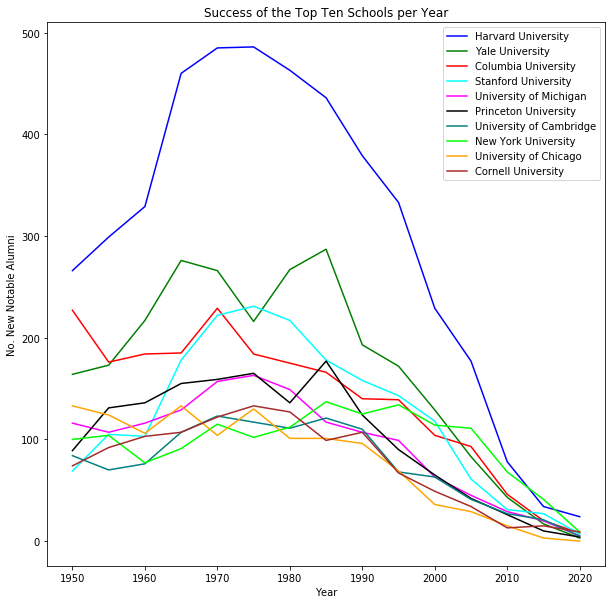

In [22]:
pyplot.figure(figsize=(10,10))
for i in range(10):
    pyplot.plot(years, schools_success_per_year[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('No. New Notable Alumni')
pyplot.title('Success of the Top Ten Schools per Year')
pyplot.show()

The shape of these curves makes sense. As we approach the current year, there are a lot of new graduates that are not yet famous: the points at 2020 are people that are famous already and have just now graduated. My assumption was there was going to be a dip around the year 2000 because it would take 20 years or so for alumni to 'find their fame'. Looking at the data, it seems like the dip happens more around the year 1980. Is this turn in the graph only due to this finding-fame effect or is there something else at work? You would think people who graduated around 1980 would have become famous by now if they are going to. But there are still plenty of people who become famous around that age so maybe it is not so far-fetched.

Let's make the graph again and limit it to 1950-1980 to try and eliminate the effects of *finding-fame*.

In [29]:
schools_success_subset = []
i = 0
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years[:7]:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the converstion from string to array
                alumnus = 'Lupita Nyong\'o'
            graduation_date = wikipeople.loc[alumnus]['birth_date'] + 22
            if graduation_date <= year and graduation_date >= year - 5:
                count += 1
        temp_success.append(count)
    schools_success_subset.append(temp_success)
    i += 1

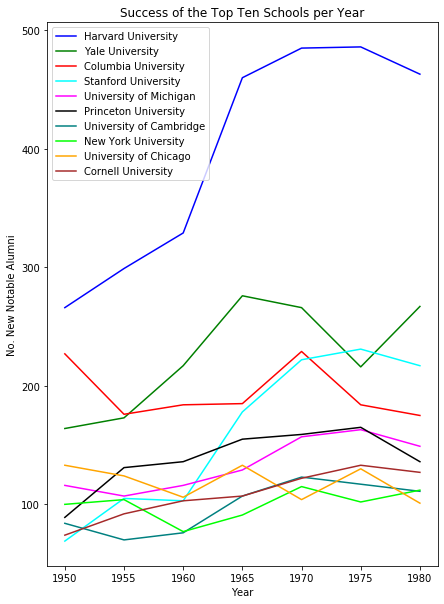

In [32]:
pyplot.figure(figsize=(7,10))
for i in range(10):
    pyplot.plot(years[:7], schools_success_subset[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('No. New Notable Alumni')
pyplot.title('Success of the Top Ten Schools per Year')
pyplot.show()

It seems that the number of notable alumni generally increases with years, but is this definitely the case? And how is each school increasing in relation to each other?

### Increasing Rate of Success

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
def regression_coef(x, y):
    x = numpy.array(x).reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    return model.coef_[0]

In [38]:
regression_slopes = []
for i in range(10):
    coef = regression_coef(years[:7],schools_success_subset[i])
    regression_slopes.append(coef)
    print(top_ten[i],': ',coef)

Harvard University :  8.007142857142856
Yale University :  3.1714285714285717
Columbia University :  -0.6785714285714288
Stanford University :  5.821428571428571
University of Michigan :  1.8000000000000003
Princeton University :  1.6571428571428575
University of Cambridge :  1.5857142857142856
New York University :  0.49999999999999994
University of Chicago :  -0.6142857142857143
Cornell University :  1.8571428571428572


According to this model, it looks like Harvard, Yale, and Stanford are increasing the most in notable alumni with UMichigan, Princeton, Cambridge, and Cornell coming up behind them. Columbia and UChicago are actually decreasing in their notable alumni output!

If this model is to be trusted, it seems to me that Columbia and UChicago might not be on this top-ten list forever.

This model might be a better one than taking total number of notable alumni. It certainly takes a closer look at how the colleges are doing closer to the present. But *how* good of a model is it?

## Evaluation of Significance
    In which I examine my new-notable-alumni-by-year model and determine whether it's results are reliable.

How likely is each school's correlation? Let's do some random permutations of number of notable alumni and see if the pattern in our graph is recognizable or just noise.

In [40]:
# let's start by looking at Harvard
def harvard_permuted_y():
    return numpy.random.permutation(schools_success_subset[0].copy())

In [46]:
harvard_permutations = []
harvard_permutation_slopes = []
for i in range(1000):
    fake_y = harvard_permuted_y()
    harvard_permutations.append(fake_y)
    numpy_years = numpy.array(years[:7]).reshape(-1,1)
    fake_model = LinearRegression().fit(numpy_years,fake_y)
    harvard_permutation_slopes.append(fake_model.coef_[0])

Let's make a histogram of 1000 randomly permuted slopes given the harvard data.

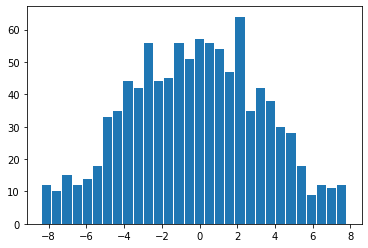

In [48]:
pyplot.hist(harvard_permutation_slopes, bins=30, align='left', rwidth=0.9)
pyplot.show()

In [50]:
print ("The actual slope for Harvard is ",regression_slopes[0])

The actual slope for Harvard is  8.007142857142856


This is at the outer edge of the 1000 randomly permuted slopes. This is certainly no coincidence! It seems safe to assume that Harvard's number of notable alumni is most definitely increasing with every year.<br><br>
But what about the other schools? Are their regression slopes reliable?

In [51]:
# a permuted() function for all schools
def permuted_y(i):
    return numpy.random.permutation(schools_success_subset[i].copy())

In [52]:
school_permutations = []
school_permutation_slopes = []
numpy_years = numpy.array(years[:7]).reshape(-1,1)
for i in range(10):
    permutations = []
    permutation_slopes = []
    for j in range(1000):
        fake_y = permuted_y(i)
        permutations.append(fake_y)
        fake_model = LinearRegression().fit(numpy_years,fake_y)
        permutation_slopes.append(fake_model.coef_[0])
    school_permutations.append(permutations)
    school_permutation_slopes.append(permutation_slopes)

Let's make histograms for all ten schools.

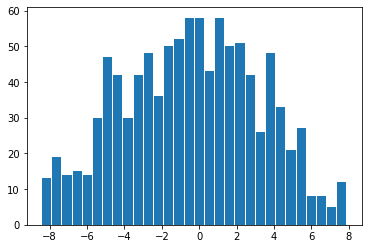

The actual slope for  Harvard University  is  8.007142857142856


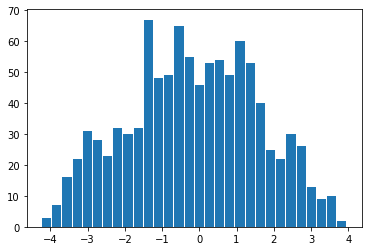

The actual slope for  Yale University  is  3.1714285714285717


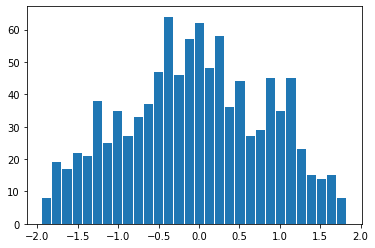

The actual slope for  Columbia University  is  -0.6785714285714288


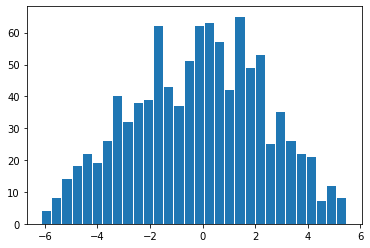

The actual slope for  Stanford University  is  5.821428571428571


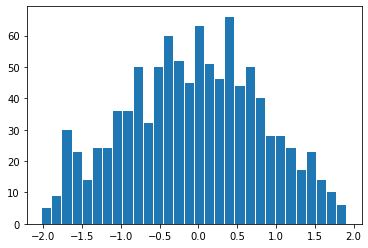

The actual slope for  University of Michigan  is  1.8000000000000003


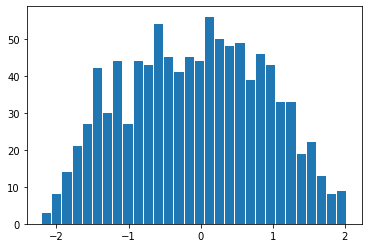

The actual slope for  Princeton University  is  1.6571428571428575


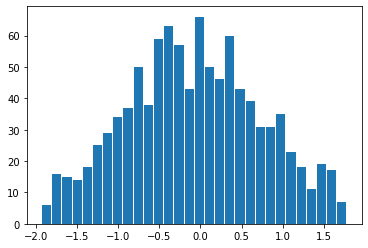

The actual slope for  University of Cambridge  is  1.5857142857142856


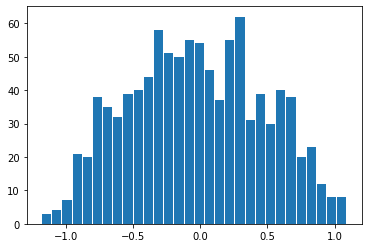

The actual slope for  New York University  is  0.49999999999999994


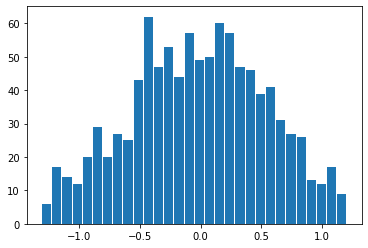

The actual slope for  University of Chicago  is  -0.6142857142857143


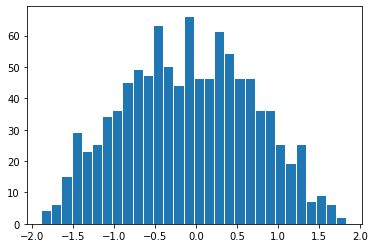

The actual slope for  Cornell University  is  1.8571428571428572


In [53]:
for i in range(10):
    pyplot.hist(school_permutation_slopes[i], bins=30, align='left', rwidth=0.9)
    pyplot.show()
    print ("The actual slope for ",top_ten[i]," is ",regression_slopes[i])

It looks like the actual slopes are at the edges of the histogram for most schools. Only the NYU slope and Columbia slope are perhaps closer to the center of the permutations slopes histogram.

What does this tell us? Well the model is reliable and these schools are really increasing in notable alumni at this rate per five years. We can trust the slopes of the regression for each school: the number of new notable alumni for each school increases by about that amount every five years.